In [91]:
import json

file = open('trans2.txt')

data = json.load(file)

data = data['data']

data

[{'account_id': '10165045',
  'amount': 10000.0,
  'category': 'transfer',
  'created_at': '2019-12-15T09:06:10Z',
  'currency_code': 'EUR',
  'description': 'Income for Simple account 1 MasterCard',
  'duplicated': False,
  'extra': {'account_balance_snapshot': 2004.12,
   'categorization_confidence': 1.0},
  'id': '2016076603',
  'made_on': '2019-09-17',
  'mode': 'normal',
  'status': 'posted',
  'updated_at': '2019-12-15T09:06:10Z'},
 {'account_id': '10165045',
  'amount': 10000.0,
  'category': 'transfer',
  'created_at': '2019-12-15T09:06:10Z',
  'currency_code': 'EUR',
  'description': 'Income for Simple account 1 MasterCard',
  'duplicated': False,
  'extra': {'account_balance_snapshot': 2004.12,
   'categorization_confidence': 1.0},
  'id': '2016076607',
  'made_on': '2019-09-21',
  'mode': 'normal',
  'status': 'posted',
  'updated_at': '2019-12-15T09:06:10Z'},
 {'account_id': '10165045',
  'amount': 10000.0,
  'category': 'transfer',
  'created_at': '2019-12-15T09:06:10Z',
 

In [92]:
from datetime import datetime

crt = 0
balance = []

data = sorted(data, key=lambda x: x['made_on'])
for d in data:
    crt += d['amount']
    balance.append([crt,  (datetime.strptime(d['made_on'], '%Y-%m-%d') - datetime(2019, 9, 17)).days])
    
# balance = sorted(balance, key=lambda x: x[1])
balance

i = 1
while i < len(balance):
    if balance[i][1] == balance[i-1][1]:
        del balance[i - 1]
        i -= 1
    i += 1

balance    

[[30000.0, 0],
 [60000.0, 4],
 [90000.0, 14],
 [120000.0, 18],
 [150000.0, 24],
 [180000.0, 30],
 [210000.0, 34],
 [240000.0, 45],
 [270000.0, 49],
 [300000.0, 55],
 [330000.0, 61],
 [360000.0, 65],
 [390000.0, 75],
 [420000.0, 79],
 [450000.0, 85],
 [450000.0, 87],
 [449974.7728373616, 89]]

In [49]:
# import zip
X, y = zip(*[([s[1],], s[0]) for s in balance])

y = list(y)
y

[30000.0,
 60000.0,
 90000.0,
 120000.0,
 150000.0,
 180000.0,
 210000.0,
 240000.0,
 270000.0,
 300000.0,
 330000.0,
 360000.0,
 390000.0,
 420000.0,
 450000.0,
 450000.0,
 449940.90427080606]

In [89]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes = (3, 3), max_iter=50000)

clf.fit(X, y)

import numpy as np
Xpred = np.array(range(X[-1][0] + 1, X[-1][0] + 31)).reshape(-1, 1)

print(y)
Ypred = clf.predict(Xpred)
Xpred = Xpred.reshape(1,30)[0] - Xpred.reshape(1,30)[0][0]

[30000.0, 60000.0, 90000.0, 120000.0, 150000.0, 180000.0, 210000.0, 240000.0, 270000.0, 300000.0, 330000.0, 360000.0, 390000.0, 420000.0, 450000.0, 450000.0, 449940.90427080606]


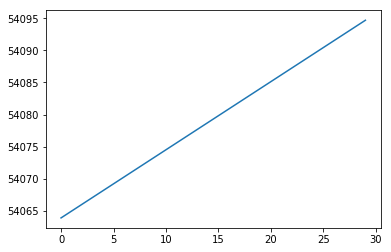

In [128]:
import matplotlib.pyplot as plt
plt.plot(Xpred, Ypred)

In [88]:
Xpred.reshape(1,30)[0] - Xpred.reshape(1,30)[0][0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [190]:
import pandas as pd
df = pd.read_csv('trans.csv', sep=';')
df

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
5,771035,2632,930102,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
6,452728,1539,930103,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
7,725751,2484,930103,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
8,497211,1695,930103,PRIJEM,VKLAD,200.0,200.0,NaN,NaN,NaN
9,232960,793,930103,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN


In [191]:
df = df[df.account_id == 5]
df = df[['balance', 'date']]
len(df)

84

In [192]:
X = df['date'].tolist()
y = df['balance'].tolist()
X = np.array(X) - min(X)
X = X.reshape(84,1)
X

array([[    0],
       [   83],
       [  183],
       [  283],
       [  383],
       [  483],
       [  501],
       [  501],
       [  578],
       [  583],
       [  600],
       [  600],
       [  675],
       [  678],
       [  683],
       [  694],
       [  701],
       [  701],
       [ 9577],
       [ 9577],
       [ 9578],
       [ 9581],
       [ 9583],
       [ 9590],
       [ 9592],
       [ 9597],
       [ 9601],
       [ 9601],
       [ 9678],
       [ 9683],
       [ 9698],
       [ 9698],
       [ 9778],
       [ 9783],
       [ 9796],
       [ 9801],
       [ 9801],
       [ 9878],
       [ 9883],
       [ 9895],
       [ 9900],
       [ 9900],
       [ 9978],
       [ 9983],
       [ 9995],
       [10001],
       [10001],
       [10078],
       [10083],
       [10094],
       [10100],
       [10100],
       [10178],
       [10183],
       [10194],
       [10201],
       [10201],
       [10278],
       [10283],
       [10293],
       [10301],
       [10301],
       [

In [232]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=(5, 5),
    max_iter=200,
    shuffle=False,
    random_state=9876,
    activation='relu')

from sklearn.preprocessing import StandardScaler
y = [13.03,
14.05,
12.07,
31.3,
17.2,]
X = [[0,], [1,], [2,], [3,], [4,]]
# y = y[-10:]
# scaler = StandardScaler()
# X = np.array(X).reshape(5,1)
# Xscaled = scaler.fit_transform(X)
print(X)
print(y)
clf.fit(X, y)

import numpy as np
# Xpred = X
# Xpred = np.array(range(X[-1][0] + 1, X[-1][0] + 31)).reshape(-1, 1)
# Xpreds = scaler.transform(Xpred).reshape(-1, 1)
# print(y)
Ypred = clf.predict([[5,]])
# Ypred = scaler.inverse_transform(Ypred)
# Xpred = Xpred.reshape(1,30)[0] - Xpred.reshape(1,30)[0][0]
# Xpred = Xpred - min(Xpred)
print(Ypred)

[[0], [1], [2], [3], [4]]
[13.03, 14.05, 12.07, 31.3, 17.2]
[25.82503943]


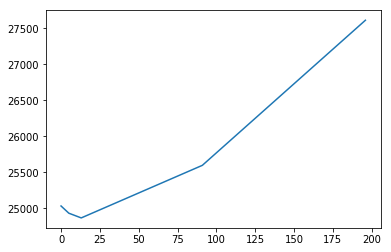

In [221]:
import matplotlib.pyplot as plt
plt.plot(Xpred, Ypred)

In [182]:
# Regression Example With Boston Dataset: Standardized and Larger
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def larger_model():
        # create model
    model = Sequential()
    model.add(Dense(13, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)

In [213]:
model.fit(Xscaled, y)

In [214]:
Ypred = model.predict(Xpreds)

In [186]:
# Ypred = scaler.inverse_transform(Ypred)

In [215]:
Ypred

array([0.42709482, 0.4284553 , 0.4298158 , 0.4311763 , 0.4325368 ,
       0.43389732, 0.43525782, 0.43661833, 0.43797883, 0.43933937,
       0.4406999 , 0.4420604 , 0.4434209 , 0.4447814 , 0.44614193,
       0.44750243, 0.44886294, 0.45022345, 0.45158395, 0.45294446,
       0.45430496, 0.45566547, 0.45702597, 0.45838648, 0.459747  ,
       0.4611075 , 0.46246803, 0.46382853, 0.465189  , 0.46654955],
      dtype=float32)

In [189]:
scaler.inverse_transform([1.0, 2.0, 3.0])

array([1., 2., 3.])

In [ ]:
$55.46
$61.99
$75.38
$61.34
$63.07